Nama  : Achmad Yuneda Alfajr

NPM    : 19081010128

Kelas : Pengenalan Pola B

 # Klasifikasi Gambar Manusia atau Kuda Menggunakan CNN

#### Dataset

Dataset yang digunakan adalah data berupa gambar. Gambar ini terbagi ke dalam data training dan data testing. Setiap data training atau testing memiliki gambar manusia dan kuda. Dataset ini saya ambil dari kaggle.com

#### Algoritma

Convolutional Neural Network (CNN) adalah salah satu jenis neural network yang biasa digunakan pada data image. CNN bisa digunakan untuk mendeteksi dan mengenali object pada sebuah image. CNN adalah sebuah teknik yang terinspirasi dari cara mamalia — manusia, menghasilkan persepsi visual. Pada kali ini, CNN akan digunakan untuk mengklasifikasi gambar apakah gambar tersebut termasuk gambar manusia atau kuda

#### Arsitektur CNN

<img src="https://www.researchgate.net/profile/Takio-Kurita/publication/320748406/figure/fig1/AS:555719381274624@1509505233044/An-example-of-CNN-architecture.png" alt="fishy" class="bg-primary mb-1" width="500px">

### 1. Import library

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as implt
from PIL import Image

### 2. Buat direktori untuk data training dan testing

In [3]:
#folder training kuda
train_horses_dir = ("horse-or-human/horse-or-human/train/horses/")

#folder training manusia
train_humans_dir = ("horse-or-human/horse-or-human/train/humans/")

#folder testing kuda
val_horses_dir = ("horse-or-human/horse-or-human/validation/horses/")

#folder testing manusia
val_humans_dir = ("horse-or-human/horse-or-human/validation/humans/")

### 3. Data Preproccessing

In [4]:
#Sema gambar pada folder train akan diubah ke piksel dengan rentang [0,1] dari [0,255]
#Hal ini akan mempercepat proses training
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('horse-or-human/horse-or-human/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1027 images belonging to 2 classes.


In [5]:
#Sema gambar pada folder validation akan diubah ke piksel dengan rentang [0,1] dari [0,255]
#Hal ini akan mempercepat proses training
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('horse-or-human/horse-or-human/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 256 images belonging to 2 classes.


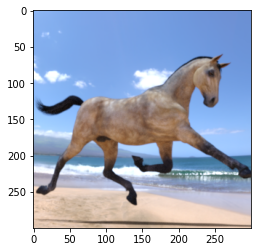

In [7]:
img = implt.imread(train_horses_dir + "/horse06-0.png")
plt.imshow(img)

### 4. Model Arsitektur CNN

In [8]:
# Instantiate and Initialize
model = models.Sequential()

# First layer
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model.add(layers.MaxPool2D(pool_size=2, strides=2))

# Second layer
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=2))

#Flatten
model.add(layers.Flatten())

#Dense
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

### 5. Menampilkan Arsitektur Lengkap Model

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

### 6. Compile and Train The Model

In [10]:
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

classifier = model.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
33/33 [==============================] - 89s 3s/step - loss: 0.4831 - accuracy: 0.7751 - val_loss: 1.1263 - val_accuracy: 0.7852
Epoch 2/10
33/33 [==============================] - 26s 790ms/step - loss: 0.1537 - accuracy: 0.9387 - val_loss: 2.8959 - val_accuracy: 0.6797
Epoch 3/10
33/33 [==============================] - 26s 799ms/step - loss: 0.1563 - accuracy: 0.9357 - val_loss: 1.7994 - val_accuracy: 0.7383
Epoch 4/10
33/33 [==============================] - 24s 735ms/step - loss: 0.1059 - accuracy: 0.9591 - val_loss: 1.1750 - val_accuracy: 0.8047
Epoch 5/10
33/33 [==============================] - 26s 772ms/step - loss: 0.0812 - accuracy: 0.9737 - val_loss: 2.0004 - val_accuracy: 0.8008
Epoch 6/10
33/33 [==============================] - 27s 792ms/step - loss: 0.0393 - accuracy: 0.9883 - val_loss: 2.2723 - val_accuracy: 0.7852
Epoch 7/10
33/33 [==============================] - 30s 924ms/step - loss: 0.0511 - accuracy: 0.9883 - val_loss: 2.5514 - val_accuracy: 0.7266
Ep

### 7. Fungsi Klasifikasi Gambar

In [26]:
training_set.class_indices

def predict(image):
    result = model.predict(image/255.0)
    if result[0][0] <0.5:
        return "Gambar diklasifikasikan sebagai kuda"
    else:
        return "Gambar diklasifikasikan sebagai manusia"

### 8. Grafik Model Accuracy

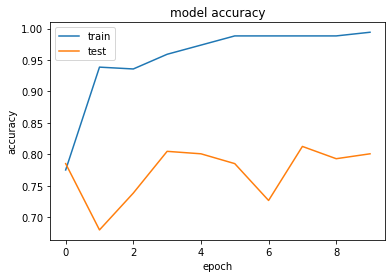

In [12]:
# summarize history for accuracy
plt.plot(classifier.history['accuracy'])
plt.plot(classifier.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 9. Grafik Model Loss

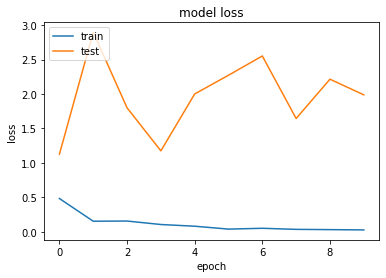

In [13]:
# summarize history for loss
plt.plot(classifier.history['loss'])
plt.plot(classifier.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 10. Klasifikasi Gambar

'Gambar diklasifikasikan sebagai manusia'

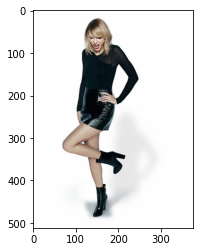

In [32]:
img_loc = 'tes/taylor_3.jpg'
predict_image = image.load_img(img_loc, target_size = (64, 64))
predict_image = image.img_to_array(predict_image)
predict_image = np.expand_dims(predict_image, axis = 0)

pred_img = implt.imread(img_loc)
plt.imshow(pred_img)

predict(predict_image)